#  Word Embeddings

Ashok Kumar Pant | AI Solution Architect | CTO and Co-founder at Treeleaf/Anydone


## Word2Vec
word2vec is the deep learning Google framework to train  word embeddings. It will use all the words of the whole corpus and predict
the nearby words. It will create a vector for all the words present in the corpus in a way so that the context is captured. It also outperforms any other methodologies in the space of word similarity and word analogies.

There are mainly 2 types in word2vec.

* Continuous Bag of Words (CBOW)
* Skip-Gram

In [27]:

# Install gensim
!pip install -q gensim

DEPRECATION: Loading egg at /Users/ashokpant/miniconda3/envs/ml/lib/python3.12/site-packages/grpcio-1.69.0-py3.12-macosx-11.0-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/ashokpant/miniconda3/envs/ml/lib/python3.12/site-packages/google_resumable_media-2.7.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/ashokpant/miniconda3/envs/ml/lib/python3.12/site-packages/Deprecated-1.2.15-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/a

In [28]:
# Configure the notebook
import numpy as np

np.set_printoptions(linewidth=200)
import pandas as pd

pd.options.display.width = 200

### Continuous Bag of Words (CBOW)

In [29]:
from gensim.models import Word2Vec

# Example sentences
sentences = [
    ['I', 'love', 'nlp'],
    ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
    ['nlp', 'is', 'future'],
    ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
    ['nlp', 'uses', 'machine', 'learning']
]

# Training the model using CBOW (Continuous Bag of Words)
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0)  # sg=0 for CBOW

# Print model information
print("Model Information:")
print(model)

# Access vector for 'nlp'
print("Vector for 'nlp':")
print(model.wv['nlp'])

# Save model
model.save('cbow.bin')

Model Information:
Word2Vec<vocab=21, vector_size=50, alpha=0.025>
Vector for 'nlp':
[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03 -9.0732267e-03
  1.3108104e-02 -9.7203208e-03 -3.6320353e-03  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03  1.2701781e-02 -6.8107317e-03
 -1.8928028e-03  1.1537147e-02 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03  1.6154874e-02 -1.1861792e-02  9.0324880e-05
 -9.5074680e-03 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02  9.9641159e-03  1.8466286e-02]


In [30]:
# Use the model

# Load saved model
model = Word2Vec.load('cbow.bin')
vocab = list(model.wv.index_to_key)
print("Vocab", vocab)

word1 = "learn"
word2 = "solves"
vector1 = model.wv[word1]
vector2 = model.wv[word2]
print(word1, vector1)
print(word2, vector2)

sim = model.wv.similarity(word1, word2)
print(f"Similarity({word1}, {word2}):", sim)

Vocab ['nlp', 'I', 'future', 'love', 'will', 'learn', 'in', '2', 'months', 'is', 'learning', 'machine', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems', 'uses', 'saves']
learn [ 2.8740549e-03 -5.2920175e-03 -1.4147566e-02 -1.5610614e-02 -1.8243574e-02 -1.1870339e-02 -3.6948491e-03 -8.6477427e-03 -1.2921341e-02 -7.4346447e-03  8.5783172e-03 -7.4780867e-03  1.6756350e-02
  3.0679870e-03 -1.4484639e-02  1.8867597e-02  1.5262425e-02  1.0986564e-02 -1.3697691e-02  1.1645358e-02  8.0181863e-03  1.0370739e-02  8.5118031e-03  3.8795089e-03 -6.3403249e-03  1.6707690e-02
  1.9224361e-02  7.5852061e-03 -5.6739901e-03  1.4255047e-05  2.4376370e-03 -1.6916649e-02 -1.6447891e-02 -4.6203137e-04  2.4745751e-03 -1.1486761e-02 -9.4505474e-03 -1.4692149e-02  1.6657231e-02
  2.4259568e-04 -9.0187974e-03  1.1403411e-02  1.8360030e-02 -8.1997439e-03  1.5929364e-02  1.0750868e-02  1.1758246e-02  1.0251808e-03  1.6426168e-02 -1.4038081e-02]
solves [ 1.6343836e-02 -8.8933157e-03  1.7955827e-02  1.

Vocab ['nlp', 'I', 'future', 'love', 'will', 'learn', 'in', '2', 'months', 'is', 'learning', 'machine', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems', 'uses', 'saves']


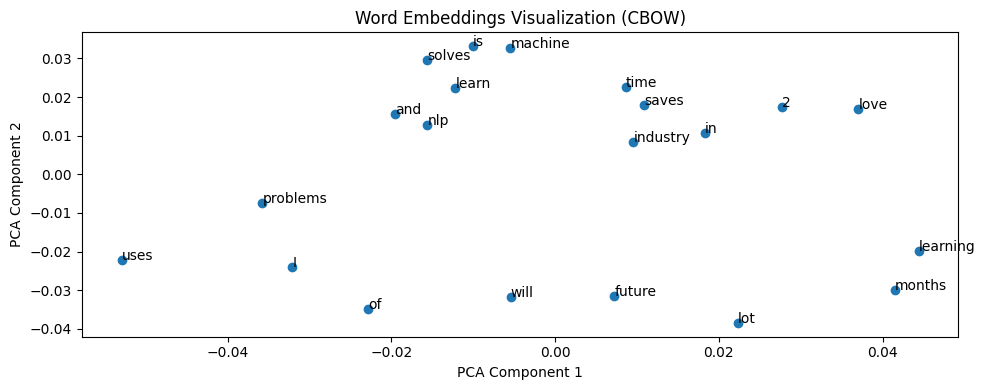

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Visualize embeddings
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
vocab = list(model.wv.index_to_key)
print("Vocab", vocab)
vectors = [model.wv[word] for word in vocab]
result = pca.fit_transform(vectors)

# Create scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
for i, word in enumerate(vocab):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('Word Embeddings Visualization (CBOW)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

### Skip-Grams

In [32]:
from gensim.models import Word2Vec

# Example sentences
sentences = [
    ['I', 'love', 'nlp'],
    ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
    ['nlp', 'is', 'future'],
    ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
    ['nlp', 'uses', 'machine', 'learning']
]

# Training the model using Skip-Gram
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)

# Print model information
print("Model Information:")
print(model)

# Access vector for 'nlp'
print("Vector for 'nlp':")
print(model.wv['nlp'])

# Save model
model.save('skipgram.bin')

Model Information:
Word2Vec<vocab=21, vector_size=50, alpha=0.025>
Vector for 'nlp':
[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03 -9.0732267e-03
  1.3108104e-02 -9.7203208e-03 -3.6320353e-03  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03  1.2701781e-02 -6.8107317e-03
 -1.8928028e-03  1.1537147e-02 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03  1.6154874e-02 -1.1861792e-02  9.0324880e-05
 -9.5074680e-03 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02  9.9641159e-03  1.8466286e-02]


In [33]:
# Use the model
# Load saved model
model = Word2Vec.load('skipgram.bin')
vocab = list(model.wv.index_to_key)
print("Vocab", vocab)

word1 = "learn"
word2 = "solves"
vector1 = model.wv[word1]
vector2 = model.wv[word2]
print(word1, vector1)
print(word2, vector2)

sim = model.wv.similarity(word1, word2)
print(f"Similarity({word1}, {word2}):", sim)

Vocab ['nlp', 'I', 'future', 'love', 'will', 'learn', 'in', '2', 'months', 'is', 'learning', 'machine', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems', 'uses', 'saves']
learn [ 2.8740549e-03 -5.2920175e-03 -1.4147566e-02 -1.5610614e-02 -1.8243574e-02 -1.1870339e-02 -3.6948491e-03 -8.6477427e-03 -1.2921341e-02 -7.4346447e-03  8.5783172e-03 -7.4780867e-03  1.6756350e-02
  3.0679870e-03 -1.4484639e-02  1.8867597e-02  1.5262425e-02  1.0986564e-02 -1.3697691e-02  1.1645358e-02  8.0181863e-03  1.0370739e-02  8.5118031e-03  3.8795089e-03 -6.3403249e-03  1.6707690e-02
  1.9224361e-02  7.5852061e-03 -5.6739901e-03  1.4255047e-05  2.4376370e-03 -1.6916649e-02 -1.6447891e-02 -4.6203137e-04  2.4745751e-03 -1.1486761e-02 -9.4505474e-03 -1.4692149e-02  1.6657231e-02
  2.4259568e-04 -9.0187974e-03  1.1403411e-02  1.8360030e-02 -8.1997439e-03  1.5929364e-02  1.0750868e-02  1.1758246e-02  1.0251808e-03  1.6426168e-02 -1.4038081e-02]
solves [ 1.63284838e-02 -8.89547914e-03  1.79741345e-02 

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Visualize embeddings
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
model = Word2Vec.load('skipgram.bin')
vocab = list(model.wv.index_to_key)
print("Vocab", vocab)
vectors = [model.wv[word] for word in vocab]
result = pca.fit_transform(vectors)

# Create scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
for i, word in enumerate(vocab):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('Word Embeddings Visualization (Skip-Gram)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

## FastText
fastText is the improvised version of word2vec. word2vec basically
considers words to build the representation. But fastText takes each
character while computing the representation of the word.

In [35]:
from gensim.models import FastText

# Example sentences
sentences = [
    ['I', 'love', 'nlp'],
    ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
    ['nlp', 'is', 'future'],
    ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
    ['nlp', 'uses', 'machine', 'learning']
]

# Train FastText model
fast = FastText(sentences, vector_size=20, window=1, min_count=1, workers=5, min_n=1, max_n=2)

# Demonstrate vector retrieval for words
print("Vector for 'nlp':")
print(fast.wv['nlp'])

print("Vector for 'deep':")
print(fast.wv['deep'])

# Save the model
fast.save('fast.bin')

Vector for 'nlp':
[-0.01044169 -0.00166992  0.00851491 -0.00545158 -0.01564237  0.01678065  0.00298395  0.00162992 -0.01518791  0.00655623  0.01039656 -0.00142836 -0.01665709  0.00949577  0.00262534 -0.00541661
  0.0063507  -0.00105192 -0.02014117  0.00102295]
Vector for 'deep':
[-0.00718654 -0.00310375 -0.00214245 -0.00143114 -0.00600196  0.00922425  0.01241926 -0.00713524 -0.00693269 -0.00987075  0.01335533 -0.00810269  0.01761531 -0.00716007 -0.00427308  0.00729467
  0.01494505 -0.01626069  0.01229173  0.01455308]


In [36]:
# Use the model
# Load saved model
model = FastText.load('fast.bin')
vocab = list(model.wv.index_to_key)
print("Vocab", vocab)

word1 = "learn"
word2 = "solves"
vector1 = model.wv[word1]
vector2 = model.wv[word2]
print(word1, vector1)
print(word2, vector2)

sim = model.wv.similarity(word1, word2)
print(f"Similarity({word1}, {word2}):", sim)

# Demonstrate FastText's ability to generate vectors for out-of-vocabulary words
print("Demonstrating out-of-vocabulary word vector generation:")
out_of_vocab_words = ['learning', 'deeplearning', 'nlpmodel']
for word in out_of_vocab_words:
    print(f"Vector for '{word}': {fast.wv[word]}")

Vocab ['nlp', 'I', 'future', 'love', 'will', 'learn', 'in', '2', 'months', 'is', 'learning', 'machine', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems', 'uses', 'saves']
learn [ 0.00349316 -0.01225737  0.01172628 -0.00482078  0.01527359  0.00457044 -0.00131968  0.00664451 -0.0098305  -0.00894084  0.01940419 -0.00896281 -0.01220377  0.01429046  0.00236036  0.00606252
  0.00360613 -0.00450385 -0.00895219  0.00266363]
solves [ 0.00686666  0.00209339 -0.00173512  0.0006682  -0.00309117  0.01199835  0.00498798 -0.00443417 -0.00053578 -0.01357355  0.01154658 -0.00098505  0.00107434  0.00838569 -0.00140993 -0.00787677
  0.01096813  0.01555869  0.00584626  0.00130047]
Similarity(learn, solves): 0.20150003
Demonstrating out-of-vocabulary word vector generation:
Vector for 'learning': [-1.4319660e-03 -8.8032829e-03  5.8035087e-03 -7.0009772e-03  6.7653628e-03  7.7824839e-03 -4.6468023e-03  2.6467426e-03 -1.2093085e-02 -1.3289730e-03  1.2271232e-02 -1.3941983e-03 -7.7663572e-04
 -6.3

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Visualize embeddings
# Apply PCA for dimensionality reduction
model = FastText.load('fast.bin')
pca = PCA(n_components=2)
vocab = list(model.wv.index_to_key)
print("Vocab", vocab)
vectors = [model.wv[word] for word in vocab]
result = pca.fit_transform(vectors)

# Create scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
for i, word in enumerate(vocab):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('Word Embeddings Visualization (Skip-Gram)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

## GloVe

- https://nlp.stanford.edu/projects/glove/

In [ ]:
# Download pre-trained glove model
# https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip 

In [ ]:
# Load using custom method
def load_glove_embeddings(glove_model_path):
    embeddings_index = {}
    with open(glove_model_path, "r", encoding="utf-8") as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype=np.float32)
            embeddings_index[word] = vector
    return embeddings_index


glove_model_path = "../../data/glove.6B.50d.txt"
model = load_glove_embeddings(glove_model_path)

# Access word vector
print(model["hello"])

In [ ]:
# Load using gensim
from gensim.models import KeyedVectors

glove_model_file = "../../data/glove.6B.50d.txt"

# Load with gensim
model = KeyedVectors.load_word2vec_format(glove_model_file, binary=False, no_header=True)
# Access word vector
print(model["hello"])

In [ ]:
# Use the model
# Load saved model
vocab = model.index_to_key[:100]
print(f"Vocab (100/{len(model.index_to_key)})", vocab)

word1 = "learn"
word2 = "solves"
vector1 = model[word1]
vector2 = model[word2]
print(word1, vector1)
print(word2, vector2)

sim = model.similarity(word1, word2)
print(f"Similarity({word1}, {word2}):", sim)

In [68]:
# king - man + women ~= queen
v1 = model.get_vector("king")
v2 = model.get_vector("man")
v3 = model.get_vector("women")
v4 = model.get_vector("queen")
result = v1-v2+v3

print(result)
print(v4)

sim = model.similar_by_vector(result)
print(sim)

sim4 = model.similar_by_vector(v4)
print(sim4)

[-0.36007404  1.11749    -0.95357     0.23340897 -0.61478996  0.39344007  0.351819    0.00892998 -0.11721998 -0.95351005  0.460624    0.00778997  0.581579   -1.6889399   1.0298901   1.06127
 -0.79307    -0.875071    0.09278601 -0.12671     0.4923401  -0.16355002  0.486629    0.19539994  0.0304636  -1.1259999  -1.1410601  -2.4913     -1.42766     0.12147999  2.4320002   1.80152
 -0.80444    -0.079      -0.03257999 -0.29144     0.19099     0.341816   -1.64169     0.17211002 -0.12176597 -0.02761006  0.37769997  0.16137004  0.25269997  0.8962599  -0.87281    -1.64715
 -1.53356    -0.70428   ]
[ 0.37854    1.8233    -1.2648    -0.1043     0.35829    0.60029   -0.17538    0.83767   -0.056798  -0.75795    0.22681    0.98587    0.60587   -0.31419    0.28877    0.56013   -0.77456    0.071421
 -0.5741     0.21342    0.57674    0.3868    -0.12574    0.28012    0.28135   -1.8053    -1.0421    -0.19255   -0.55375   -0.054526   1.5574     0.39296   -0.2475     0.34251    0.45365    0.16237
  0.52464